Link dashboard tableau: https://public.tableau.com/views/Milestones1_17393585197170/Dashboard1?:language=en-US&publish=yes&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link

# I. Perkenalan

<p>=================================================<br>
Milestones Project<br>
<br>
Nama  : Dionisius Ray<br>
Batch : HCK - 025<br>
<br>
Produk ini dibuat untuk menganalisis data transaksi sebuah supermarket untuk pembuatan promo kartu kredit yang dapat menarik nasabah baru.<br>
=================================================</p>

# II. Identifikasi Masalah

## Topik

<p>Pembuatan Promo</p>

## Latar Belakang

<p>Sebagai tim data analitik di sebuah bank, tim data diminta untuk mendukung tim promosi membuat promo untuk kartu kredit dengan menganalisis data transaksi dari sebuah supermarket. Bank berencana menjalin kolaborasi promosi dengan supermarket tersebut, dan tugas tim data analitik adalah menganalisis berbagai transaksi.</p>

## SMART

<ul>
    <li>Specific</li>
    <p>Meningkatkan jumlah nasabah bank dengan menganalisis data transaksi sebagai pendoman dalam penyusunan promo pembelian produk menggunakan kartu kredit.</p>
    <li>Measurable</li>
    <p>Meningkatkan jumlah nasabah bank sebesar 10%.</p>
    <li>Achievable</li>
    <p>Dengan hasil analisis, tim data analitik dapat mengidentifikasi pola pengeluaran dan preferensi konsumen untuk menghasilkan data yang dapat membantu tim promosi dalam pembentukan promo.</p>
    <li>Relevant</li>
    <p>Dengan pembuatan promo baru, pihak bank akan mendapatkan nasabah baru.</p>
    <li>Time-Bound</li>
    <p>Target peningkatan nasabah sebesar 10% dapat dicapai dalam jangka waktu tiga bulan.</p>
</ul>

## Problem Statement

<p>Bagaimana cara meningkatkan nasabah baru sebesar 10% dalam 3 bulan dengan menggunakan hasil analisis data untuk penyusunan promo pembayaran melalui kartu kredit baru?</p>

## Penjabaran Masalah

<ol>
    <li>Dari semua transaksi yang terjadi, bagaimana persentase distribusi metode pembayaran yang digunakan? (Visualisasi)</li>
    <li>Kategori apa yang manghasilkan total spend terbanyak dari seluruh metode pembayaran? (Visualisasi)</li>
    <li>Bagaimana Tren Data Pembelian Produk per Kuarter (Visualisasi)</li>
    <li>Bagaimana distribusi transaksi yang terjadi di setiap tipe lokasi? (Visualisasi)</li>
    <li>Bagaimana distribusi transaksi yang terjadi berdasarkan setiap metode pembayaran? (Visualisasi)</li>
    <li>Apakah ada perbedaan signifikan total spend pada tipe transaksi yang menggunakan kartu kredit dibandingkan dengan yang tidak? 
    <br>(Statistika Deskriptif dan Inferensial)</li>
</ol>

# III. Data Exploration/Loading

## Inisialisasi dan Import

In [ ]:
# Cell untuk mengimport library yang akan digunakan

import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from scipy import stats

In [ ]:
# Cell untuk membaca file data mentah dan menampilkan 5 data pertama

df = pd.read_csv('spending_patterns_detailed.csv')
df.head(5)

,Customer ID,Category,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,CUST_0159,Groceries,Milk,1,1.28,1.28,Debit Card,Mobile App,2024-11-13
1,CUST_0017,Friend Activities,Dinner with Friends,2,74.69,149.39,Debit Card,In-store,2023-05-04
2,CUST_0094,Housing and Utilities,Water Bill,1,76.06,76.06,Digital Wallet,Mobile App,2023-12-16
3,CUST_0162,Fitness,Yoga Class,5,11.24,56.18,Cash,In-store,2024-01-28
4,CUST_0129,Gifts,Flowers,3,43.71,131.12,Debit Card,In-store,2023-07-28


## Rangkuman data

In [ ]:
# Cell untuk memberikan gambaran ringkas isi dari tabel

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Customer ID       10000 non-null  object 
 1   Category          10000 non-null  object 
 2   Item              10000 non-null  object 
 3   Quantity          10000 non-null  int64  
 4   Price Per Unit    10000 non-null  float64
 5   Total Spent       10000 non-null  float64
 6   Payment Method    10000 non-null  object 
 7   Location          10000 non-null  object 
 8   Transaction Date  10000 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 703.3+ KB


# IV. Data Cleaning

## Cek missing value

In [ ]:
# Pengecekan missing value standard menggunakan .isnull()

df.isnull().sum()

Customer ID         0
Category            0
Item                0
Quantity            0
Price Per Unit      0
Total Spent         0
Payment Method      0
Location            0
Transaction Date    0
dtype: int64

<p>Tidak terdapat normal missing value</p>

In [ ]:
# Cell mengecek untuk non-standard missing value

cek_category = df['Category'].unique()
cek_custID = df['Customer ID'].unique()
cek_item = df['Item'].unique()
cek_loc = df['Location'].unique()
cek_payment = df['Payment Method'].unique()

print(f'''
Unique Category: {cek_category}
Unique Category: {cek_custID}
Unique Category: {cek_item}
Unique Category: {cek_loc}
Unique Category: {cek_payment}
''')


Unique Category: ['Groceries' 'Friend Activities' 'Housing and Utilities' 'Fitness' 'Gifts'
 'Transportation' 'Travel' 'Personal Hygiene' 'Hobbies' 'Shopping'
 'Medical/Dental' 'Food' 'Subscriptions']
Unique Category: ['CUST_0159' 'CUST_0017' 'CUST_0094' 'CUST_0162' 'CUST_0129' 'CUST_0071'
 'CUST_0165' 'CUST_0147' 'CUST_0116' 'CUST_0150' 'CUST_0048' 'CUST_0110'
 'CUST_0072' 'CUST_0100' 'CUST_0199' 'CUST_0008' 'CUST_0065' 'CUST_0136'
 'CUST_0023' 'CUST_0193' 'CUST_0041' 'CUST_0190' 'CUST_0163' 'CUST_0155'
 'CUST_0064' 'CUST_0021' 'CUST_0050' 'CUST_0109' 'CUST_0156' 'CUST_0083'
 'CUST_0180' 'CUST_0028' 'CUST_0140' 'CUST_0038' 'CUST_0191' 'CUST_0001'
 'CUST_0073' 'CUST_0107' 'CUST_0058' 'CUST_0043' 'CUST_0145' 'CUST_0042'
 'CUST_0046' 'CUST_0011' 'CUST_0024' 'CUST_0130' 'CUST_0057' 'CUST_0091'
 'CUST_0030' 'CUST_0053' 'CUST_0027' 'CUST_0063' 'CUST_0132' 'CUST_0022'
 'CUST_0182' 'CUST_0188' 'CUST_0154' 'CUST_0122' 'CUST_0096' 'CUST_0104'
 'CUST_0076' 'CUST_0126' 'CUST_0194' 'CUST_0035' 'C

<p>Pada kolom yang menyimpan data String, tidak terdapat missing value non-standard</p>

## Cek Duplikat

In [ ]:
# Cell yang mencari nilai duplikat

num_of_duplicate=df.duplicated().sum()
print(f'Jumlah duplikat: {num_of_duplicate}')

Jumlah duplikat: 0


## Penggantian Tipe Data Kolom

In [ ]:
# Cell ini mengubah tipe data kolom Transaction Date dari string menjadi Date Time

df['Transaction Date'] = pd.to_datetime(df['Transaction Date'])

<p>Hasil pengecekan data yang dihasilkan adalah data pada tabel sudah bersih. Tidak terdapat missing value yang standard maupun yang tidak standard sehingga tidak ada yang perlu diubah atau dihapus kolom atau rownya.</p>

# V. Analisis

## i. Distribusi Metode Pembayaran Dari Semua Transaksi

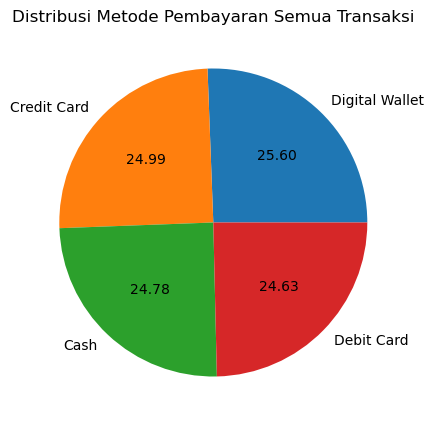

In [ ]:
# Cell ini membuat visualisasi pie chart berdasarkan Payment Method 

payment_distribution = df['Payment Method'].value_counts(normalize=True) * 100

plt.figure(figsize=(5,5))
payment_distribution.plot(kind='pie', autopct='%.2f')
plt.title('Distribusi Metode Pembayaran Semua Transaksi')
plt.ylabel('')
plt.show()

<p>Antara semua tipe pembayaran, pelanggan cenderung melakukan transaksi menggunakan Digital Wallet walaupun perbedaan tidak terdapat banyak. Persaingan pembayaran produk tidak memiliki cara membayar yang dominan secara signifikan. Digital Wallet merupakan metode yang mendominasi denan margin yang sedikit. Tren transaksi Digital Wallet bisa digunakan sebagai patokan untuk membantu pembuatan promo kartu kredit agar dapat menghasilkan sebuah promo yang dapat menarik nasabah baru.</p>

## ii. Kategori apa yang Manghasilkan Total Spent Terbanyak dari Seluruh Metode Pembayaran?

In [ ]:
# Cell ini membuat Stack Bar Chart interactive menggunakan plotly yang mengvisualisaskikan Total Spend untuk setiap Payment Method berdasarkan Category

spending = df.groupby(['Category', 'Payment Method'])['Total Spent'].sum().sort_values(ascending=False).reset_index()

fig1 = px.bar(spending, x='Category', y='Total Spent', title='Total Spent per Kategori Berdasarkan Metode Pembayaran', 
             color='Payment Method', barmode='stack', log_y=True )
fig1.show()

<p>Berdasarkan grafikk yang ada, pelanggan pada supermarket cenderung membeli barang yang berkategori shopping. Dari hasil data ini, tim promosi bisa membuat promosi untuk pembelian produk Shopping sebagai target utama promo yang akan dibuat. Selain itu tim promosi dapat mempertimbangkan membuat promo untuk produk pada kategori Housing and Utilities ataupun Fitness sebagai pilihan alternatif target pembuatan promosi untuk menarik nasabah baru.</p>

## iii. Bagaimana Tren Data Pembelian Produk per Kuarter?

In [ ]:
# Cell untuk membuat line chart trend data pembelian per kuarter

spending_trend = df.groupby(pd.Grouper(key='Transaction Date', freq='Q'))['Total Spent'].sum().reset_index()
spending_trend = spending_trend.sort_values('Transaction Date').reset_index(drop=True)

spending_trend['Transaction Date'] = spending_trend['Transaction Date'].dt.to_period('Q').astype(str)

fig2 = px.line(spending_trend, x='Transaction Date', y='Total Spent', title='Trend Data Pembelian Produk dari Waktu ke Waktu')
fig2.show()

C:\Users\Dionisius\AppData\Local\Temp\ipykernel_6044\3177381899.py:1: FutureWarning:

'Q' is deprecated and will be removed in a future version, please use 'QE' instead.



<p>Dari hasil visualisasi, pelanggan lebih cenderung membeli produk di bulan Oktober, November, dan Desember. Tim promosi bisa menargetkan bulan ini untuk pembuatan promo seasonal seperti Halloween ataupun Christmas.</p>

## iv. Bagaimana Distribusi Transaksi yang Terjadi di Setiap Tipe Lokasi?

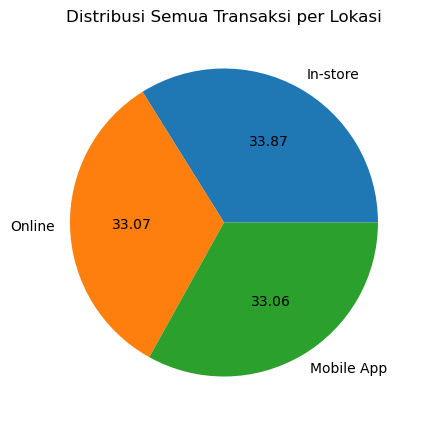

In [ ]:
# Cell ini membuat pie chart yang menggambarkan distribusi transaksi yang terjadi di setiap lokasi

payment_distribution = df['Location'].value_counts(normalize=True) * 100

plt.figure(figsize=(5,5))
payment_distribution.plot(kind='pie', autopct='%.2f')
plt.title('Distribusi Semua Transaksi per Lokasi')
plt.ylabel('')
plt.show()

<p>Distribusi pelanggan melakukan aktifitas belanja di lokasi mana terlihat rata. Melihat dari chart yang ada, Pelanggan memiliki sedikit preferensi terhadap langsung datang ke toko langsung. Target pembuatan promo bisa dibuat khusus untuk yang langsung datang ke toko. Tetapi karena perbedaan tidak terlalu berbeda, tim promosi bisa saja membuat promo yang lebih universal.</p>

## v. Bagaimana Distribusi Transaksi yang Terjadi Berdasarkan Setiap Metode Pembayaran

In [ ]:
# Cell ini membuat group bar chart berdasarkan Location dan Payment Method untuk menghitung persentase metode pembayaran yang digunakan per lokasi

dist_transaksi_per_metode = df.groupby('Location')['Payment Method'].value_counts(normalize=True).reset_index(name='Percent')
dist_transaksi_per_metode['Percent'] *= 100

fig4 = px.bar(dist_transaksi_per_metode, x='Location', y='Percent', title='Distribusi Metode Transaksi Berdasarkan Lokasi', 
             color='Payment Method', barmode='group', log_y=True,
            text = dist_transaksi_per_metode['Percent'].map('{:.2f}'.format))

fig4.update_traces(texttemplate='%{text}%', textposition='outside')
fig4.show()

<p>Melihat dari hasil visualisasi, karena target yang diminta adalah dalam pembuatan promo kartu kredit, maka tim promosi lebih baik menargetkan proo untuk lokasi In-Store dan Mobile App. Kedua lokasi lebih cenderung menggunakan pembayaran kartu kredit dibanding online.</p>

## vi. Apakah ada Perbedaan Signifikan Total Spend pada Tipe Transaksi yang Menggunakan Kartu Kredit dibandingkan dengan yang Tidak?

<p>Untuk membuat promo baru, tim data memiliki pemikiran bahwa pelanggan belanja dengan metode tertentu karena sebuah alasan tertentu seperti lebih mudah atau karena ada benefit tertentu. Maka dari itu tim data memiliki hipotesis:<br><br>
<b>H0: Tidak terdapat perbedaan signifikan antara total spend pembayaran menggunakan kartu kredit dengan metode lain.<br> 
H1: Terdapat perbedaan signifikan antara total spend pembayaran menggunakan kartu kredit dengan metode lain.</b>

In [ ]:
# Cell ini mencari nilai skew untuk menentukan apakah data terdistribusi normal

print(f'Skewness: {df["Total Spent"].skew():.2f}')

Skewness: 11.02


<p>Melihat hasil skewness, data tidak terdistribusi normal. Skewness bersifat berat positif. Hal ini mungkin terjadi karena terdapat nilai transaksi yang dijual dengan harga jauh lebih tinggi. Skewness ini terjadi secara alamai karena memang pada saat melakukan transaksi belanja, pasti ada beberapa barang atau jasa yang bernilai lebih mahal seperti berlian, jasa konsultasi dokter, pembelian tiket, dsb. Maka dari itu Outlier akan dibiarkan dalam analisis data. Untuk menguji nilai korelasi, saya akan menggunakan metode Mann Whitney U-Test yang mengetes relasi antara data kategorikal dengan data numerikal kontinu.</p>

In [ ]:
# Cell ini menjalankan Mann Whitney U-Test untuk mendapatkan nilai U-Statistik dan p-value

credit_card = df.query('`Payment Method` == "Credit Card"')['Total Spent']
other_payment = df.query('`Payment Method` != "Credit Card"')['Total Spent']

u_stat, p_value = stats.mannwhitneyu(credit_card, other_payment, alternative='two-sided')

print(f"Nilai U Statistik: {u_stat:.2f}")
print(f"Nilai p-value: {p_value:.2f}")

Nilai U Statistik: 9116192.00
Nilai p-value: 0.04


<p>Dari hasil uji Mann Whitney U-Test, hipotesis null berhasil ditolah yang berarti bahwa iya, terdapat perbedaan signifikan dalam total spend antar transaksi yang menggunakan kartu kredit dengan yang tidak. Jika dilihat dari nilai U-Statistiknya, korelasi antara total spend dengan metode pembayaran kartu kredit memiliki korelasi yang kuat. Menggunakan korelasi ini, tim promo bisa menyesuaikan bagaimana nilai promo akan dibuat jika misalkan promo yang ingin dibuat adalah diskon pada minimal pembelajaan, atau mereka bisa menguntungkan pembelian produk yang harganya besar.</p>

# Kesimpulan

<p>Bagaimana cara meningkatkan jumlah nasabah baru sebesar 10% dengan membuat sebuah promosi baru yang didasari Kartu Kredit? Berdasarkan hasil analisis, pada saat perencenaan promosi yang akan dibuat nanti, tim promosi bisa memanfaatkan pemberian hadiah ketika user menggunakan kartu kredit saat membayar menggunakan kredit untuk kategori barang tertentu seperti kategori Shopping, Fitness, ataupun Housing and Utilities. Untuk membantu dalam proses pembuatan promosi juga, tim promo bisa melihat metode pembayaran Digital Wallet sebagai patokan pembentukan promosi karena metode ini adalah metode yang paling sering dilakukan. Melihat trend data transaksi dari waktu ke waktu juga, selalu terdapat peningkatan transaksi yang terjadi pada saat kuarter 4 yaitu Oktober, November, dan Desember. Tim promo bisa saja membuat promosi besar khusus untuk musim ini seperti promo khusus natal ataupun halloween. Walaupun tidak terdapat banyak perbedaan pada jenis lokasi toko yang dikunjungi pelanggan untuk melakukan transaksi, melihat trend transaksi yang terjadi berdasarkan payment method di setiap lokasi, tim promo bisa memfokuskan pembuatan promo da lokasi In-Store ataupun Mobile App. Terakhir utim promosi dapat membuatkan sebuah promo yang berfokus pada pembelian harga yang besar, karena melihat hasil analisis korelasi, pelanggan cenderung membayar produk yang mahal dengan menggunakan kartu kredit karena mungkin lebih mudah.</p>